# 1. 데이터 구성

•Pregnancies : 임신 횟수

•Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도

•BloodPressure : 이완기 혈압 (mm Hg)

•SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값

•Insulin : 2시간 혈청 인슐린 (mu U / ml)

•BMI : 체질량 지수 (체중kg / 키(m)^2)

•DiabetesPedigreeFunction : 당뇨병 혈통 기능

•Age : 나이

•Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# 2. 필요한 라이브러리 로드



In [5]:
# 데이터 분석을 위한 pandas, 수치 계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 로드

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 3. 데이터셋 로드

In [6]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 4. 학습,예측 데이터셋 나누기

In [9]:
# 8:2 비율로 구하기 위해 전체 데이터 행의 80%에 해당하는 값을 구해서 split_count변수에 담아줌
split_count = int(df.shape[0]*0.8)
split_count

614

In [14]:
# train, test로 슬라이싱을 통해 데이터를 나눔
train = df[:split_count].copy()
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
609,1,111,62,13,182,24.0,0.138,23,0
610,3,106,54,21,158,30.9,0.292,24,0
611,3,174,58,22,194,32.9,0.593,36,1
612,7,168,88,42,321,38.2,0.787,40,1


In [15]:
test = df[split_count:].copy()
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
614,11,138,74,26,144,36.1,0.557,50,1
615,3,106,72,0,0,25.8,0.207,27,0
616,6,117,96,0,0,28.7,0.157,30,0
617,2,68,62,13,15,20.1,0.257,23,0
618,9,112,82,24,0,28.2,1.282,50,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 5. 학습과 예측에 사용할 컬럼

In [20]:
#feature_names라는 변수에 학습과 예측에 사용할 컬럼명 저장
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# 6. 정답값이자 예측해야 할 값

In [28]:
#lable_name에 예측할 컬럼의 이름 저장
label_name = train.columns[-1]
label_name

'Outcome'

# 7. 학습,예측 데이터셋 만들기

In [30]:
#학습 세트 만들기 ex)시험의 기출 문제
X_train = train[feature_names]
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
609,1,111,62,13,182,24.0,0.138,23
610,3,106,54,21,158,30.9,0.292,24
611,3,174,58,22,194,32.9,0.593,36
612,7,168,88,42,321,38.2,0.787,40


In [31]:
#정답 값 만들기 ex)기출문제 정답
y_train = train[label_name]
y_train

0      1
1      0
2      1
3      0
4      1
      ..
609    0
610    0
611    1
612    1
613    0
Name: Outcome, Length: 614, dtype: int64

In [32]:
# 예측에 사용할 데이터 셋 ex)실전 시험 문제
X_test = test[feature_names]
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [33]:
# 예측의 정답값 ex)실전 시험 문제의 정답 - 현실에서는 모름
y_test = test[label_name]
y_test

614    1
615    0
616    0
617    0
618    1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 154, dtype: int64

# 8. 머신러닝 알고리즘 가져오기

In [38]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

# 9. 학습시키기

In [39]:
model.fit(X_train,y_train) # 기출문제 공부

DecisionTreeClassifier()

# 10. 예측

In [52]:
y_predict = model.predict(X_test) # 실전 시험 문제 풀기 -> 정답은 주어지지 않음

# 11. 트리 알고리즘 분석하기

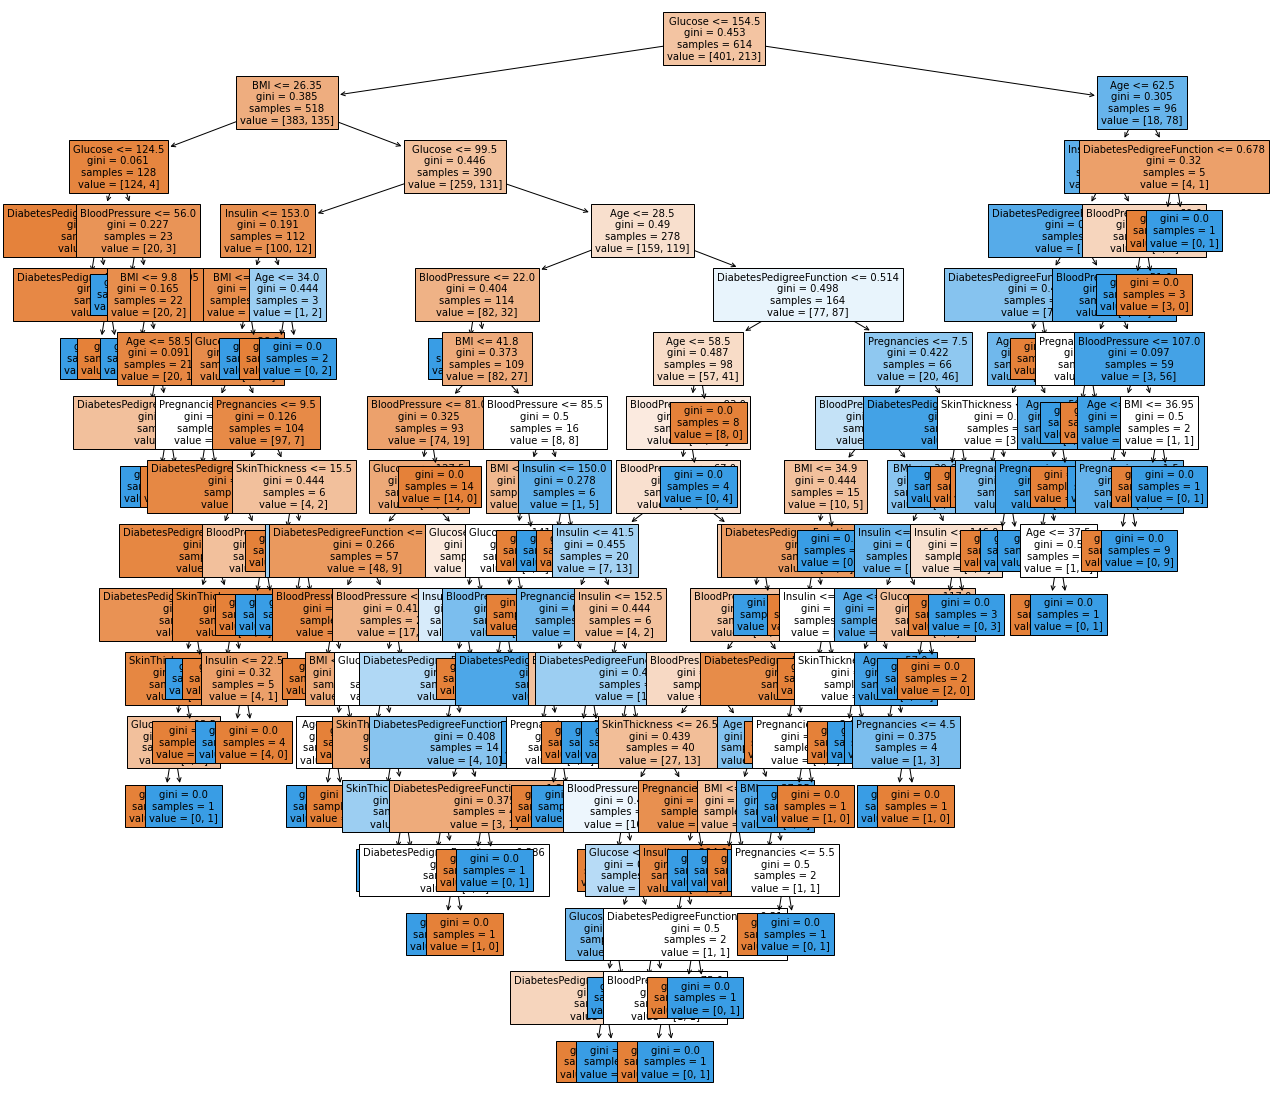

In [46]:
# 의사결정나무 시각화
from sklearn.tree import plot_tree
plt.figure(figsize = (20,20))
tree = plot_tree(model,feature_names = feature_names,
                filled = True, fontsize= 10)
#글루코스가 가장 좋은 기준임을 확인할 수 있음

In [49]:
# 피처의 중요도 추출
model.feature_importances_

array([0.0782703 , 0.30838411, 0.13750496, 0.04453499, 0.07009689,
       0.1319891 , 0.13301765, 0.09620199])

<AxesSubplot:>

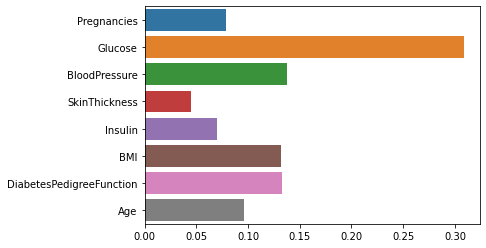

In [50]:
# 피처의 중요도 시각화 하기
sns.barplot(x=model.feature_importances_,y=feature_names)

# 12. 정확도 측정하기

In [58]:
# 실제값 - 예측값을 뺴주면 맞은것(같은값)은 0, 틀린 것은 1 출력
# 절대값 씌워서 다르게 예측한 경우 구하기
diff_count = abs(y_test - y_predict).sum()

In [59]:
# 정확도
(len(y_test) - diff_count)/len(y_test)

0.7532467532467533

In [62]:
# 미리 구현된 알고리즘으로 구해보기
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.7532467532467533

In [63]:
# model의 score로 계산해보기
model.score(X_test,y_test)

0.7532467532467533

In [64]:
# EDA를 통해 정확도를 올리자!!